# ARIMA Time Series Forecasting

## Introduction
This project focuses on using the ARIMA model to forecast future values in a time series dataset. We will go through the steps of loading and cleaning the data, handling missing values, and building and evaluating the ARIMA model.

## Step-by-Step Process

### 1. Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


#***2. Load the Data***

In [ ]:
data = pd.read_csv('modified_working_data.csv')
data.head()

,SubCounty,class,Year,PermitNo,ServiceHeaderID,DATE,CustomerName,pin,ServiceName,Amount,IssuedBy,BusinessActivity,Service Code,Ward,PhysicalLocation,DayOfWeek,Month,Column1,LogAmount,frequency
0,Kesses,micro,2023,AVJK14WGU0,2846320,06/11/2023,BERUR CHEMIST,A010342075J,723-Health Institutions/Services Health clinic...,4000.0,NANCY J KEMEI,CHEMIST,723,TULWET-CHUIYAT,"Building: TALA BUSINESS CENTRE, Floor: GROUND...",0,11,NaN,8.294300,1.0
1,Moiben,micro,2023,XZVT4NOA02,2846146,03/11/2023,TYCOON MWANGI,A018655361F,113-Small Boutique less than 2 employees and l...,2000.0,WIBERFORCE J WABUKO,BOUTIQUE,113,Kimumu,"Building: N/A, Floor: GROUND FLOOR, Room: 1, R...",4,11,NaN,7.601402,1.0
2,SOY,micro,2023,1RZG3FWC5E,2846220,03/11/2023,CORNER PUB,A014102776K,567-Small Bar/Traditional Beer Seller up to 15...,4000.0,boaz kiprotich,SMALL BAR,567,Ziwa,"Building: CORNER HSE, Floor: 0, Room: 0, Road:",4,11,NaN,8.294300,1.0
3,Turbo,micro,2023,W5E30PJG4H,2791569,02/11/2023,KEJU,A003889655V,647-KINYOZI/SALON Small,3400.0,RICHARD AMDANY,KINYOZI / SALON,647,Ngenyilel,"Building: KEJU, Floor: 1, Room: 2, Road:",3,11,NaN,8.131825,1.0
4,Turbo,micro,2023,280RSZQCJE,2845836,02/11/2023,EDDIESCAPES POWER ENGINEERING SOLUTIONS COMPAN...,P052271153R,695-Other professional and technical services,3400.0,WABWIRE SIMIYU DAVID,"ELECTRICAL INSTALLATIONS,CONSULTANCY & SUPPLIES",695,Kiplombe,"Building: N/A, Floor: GROUND FLOOR, Room: 1, R...",3,11,NaN,8.131825,1.0


***3. Data Cleaning***


---


Drop unnecessary columns to simplify the dataset.

In [ ]:
to_drop=['SubCounty','LogAmount','frequency','Year','PermitNo','ServiceHeaderID','pin','CustomerName','ServiceName','IssuedBy','BusinessActivity','Service Code','Ward','PhysicalLocation','DayOfWeek','Month','Column1']
data.drop(to_drop,inplace=True,axis=1)

In [ ]:
data.head()

,class,DATE,Amount
0,micro,06/11/2023,4000.0
1,micro,03/11/2023,2000.0
2,micro,03/11/2023,4000.0
3,micro,02/11/2023,3400.0
4,micro,02/11/2023,3400.0


#***4. Group and Save Data by Class***

---



Group the dataset by the "class" column and save each group to a separate CSV file.

In [ ]:
# Group the dataset by the "class" column
grouped = data.groupby("class")

# Iterate over each group
for group_name, group_data in grouped:
    # Define the filename for this group
    filename = f"{group_name}.csv"

    # Save the group data to a CSV file
    group_data.to_csv(filename, index=False)


#***5. Load the 'Micro' Class Data***

In [ ]:
df=pd.read_csv('micro.csv')
df.describe()

,Amount
count,31378.000000
mean,3274.726560
std,799.540302
min,520.000000
25%,2800.000000
50%,3400.000000
75%,4000.000000
max,4000.000000


#***6. Convert 'DATE' to Datetime Format***

Ensure the 'DATE' column is in the correct format.

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True).dt.strftime('%Y-%m-%d')


#***7. Drop 'class' Column and Set Index***

In [ ]:
df.drop(columns='class')

,DATE,Amount
0,2023-11-06,4000.0
1,2023-11-03,2000.0
2,2023-11-03,4000.0
3,2023-11-02,3400.0
4,2023-11-02,3400.0
...,...,...
31373,2016-03-01,2000.0
31374,2016-03-01,4000.0
31375,2016-02-27,3400.0
31376,2016-02-26,2000.0


In [ ]:
df.set_index('DATE', inplace=True)
df.sort_index(inplace=True)


#***8. Visualize Data Distribution***

Check the distribution and presence of outliers.

<AxesSubplot: xlabel='Amount', ylabel='Density'>

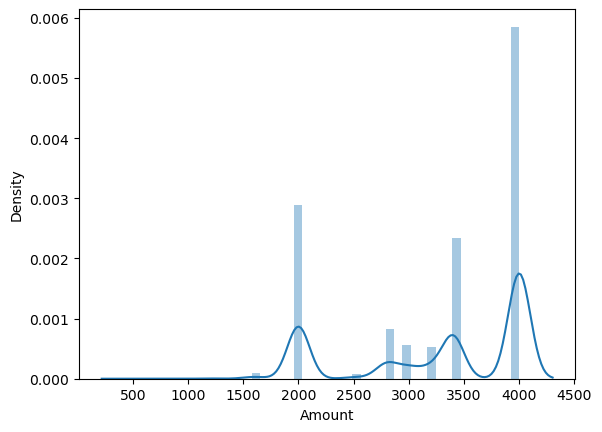

In [ ]:
sns.distplot(df['Amount'])

<AxesSubplot: ylabel='Amount'>

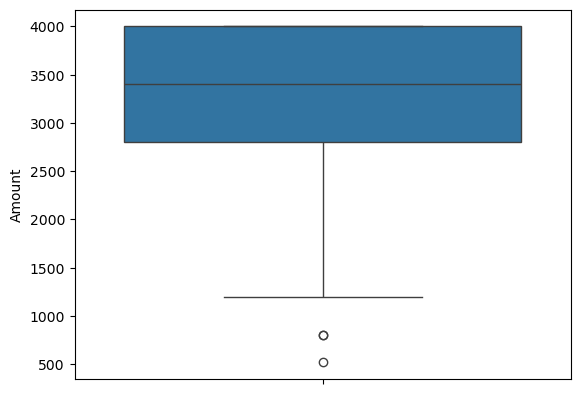

In [ ]:
sns.boxplot(y='Amount',data=df)

In [ ]:
df.describe()

,Amount
count,31378.000000
mean,3274.726560
std,799.540302
min,520.000000
25%,2800.000000
50%,3400.000000
75%,4000.000000
max,4000.000000


#***9. Remove Outliers***

Calculate the IQR and filter out the outliers.

In [ ]:
Q1=2800
Q3=4000
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
lower_lim,upper_lim

(1000.0, 5800.0)

In [ ]:
#printinng the outliers
df[(df.Amount<lower_lim)|(df.Amount>upper_lim)]

,class,Amount
DATE,,
2017-01-27,micro,800.0
2017-05-31,micro,800.0
2017-07-14,micro,520.0


In [ ]:
new_df=df.loc[(df['Amount']>lower_lim)]
print('Old data:',len(df))
print('New data:',len(new_df))



Old data: 31378
New data: 31375


<AxesSubplot: ylabel='Amount'>

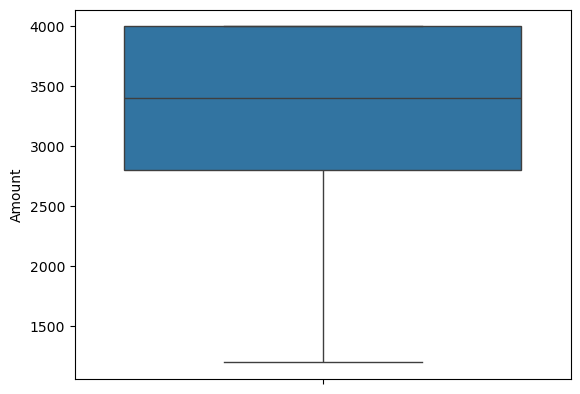

In [ ]:
sns.boxplot(y='Amount',data=new_df)

#***10. Check for Stationarity***

Perform the Augmented Dickey-Fuller test to check for stationarity.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['Amount'])

1. ADF :  -13.206003041192485
2. P-Value :  1.0705379300528574e-24
3. Num Of Lags :  51
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 31326
5. Critical Values :
	 1% :  -3.430558767028339
	 5% :  -2.861632269526914
	 10% :  -2.566819112228498


#Check out best order for Arima MOdel

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Amount'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                31378
Model:               SARIMAX(5, 1, 0)   Log Likelihood             -255560.558
Date:                Sun, 09 Jun 2024   AIC                         511133.116
Time:                        16:28:07   BIC                         511183.239
Sample:                             0   HQIC                        511149.164
                              - 31378                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8173      0.006   -146.666      0.000      -0.828      -0.806
ar.L2         -0.6542      0.007    -92.506      0.000      -0.668      -0.640
ar.L3         -0.4886      0.007    -65.619      0.000      -0.503      -0.474
ar.L4         -0.3253      0.007    -46.115      0.000      -0.339      -0.312
ar.L5         -0.1561      0.006    -27.979      0.000      -0.167      -0.145
sigma2      6.951e+05   6730.076    103.277      0.000    6.82e+05    7.08e+05
===================================================================================
Ljung-Box (L1) (Q):                  15.65   Jarque-Bera (JB):              1768.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#***12. Split the Data into Training and Testing Sets***

In [ ]:
split_date = '2021-06-09'
train_data = df.loc[:split_date, 'Amount']
test_data = df.loc[split_date:, 'Amount']

#***13. Fit ARIMA Model***

Fit the ARIMA model on the training data.

In [ ]:
# Fit ARIMA model
order = (5, 1, 0)
model = ARIMA(train_data, order=order)
fitted_model = model.fit()


#***14. Forecast Future Values***

Use the fitted model to forecast the test data.

In [ ]:
# Forecast future values
forecast = fitted_model.forecast(steps=len(test_data))


#***15. Evaluate Forecast Accuracy***

Calculate evaluation metrics for the forecast.

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Evaluate the forecast accuracy
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test_data, forecast)
accuracy = 100 - mape

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)
print("Forecast Accuracy:", accuracy)

Mean Squared Error: 696183.1701139845
Mean Absolute Error: 602.5720738103721
Root Mean Squared Error: 834.3759165472027
Mean Absolute Percentage Error: 24.15152606139085
Forecast Accuracy: 75.84847393860915


#***16. Plot Actual vs. Forecasted Values***

Visualize the forecast against actual values.

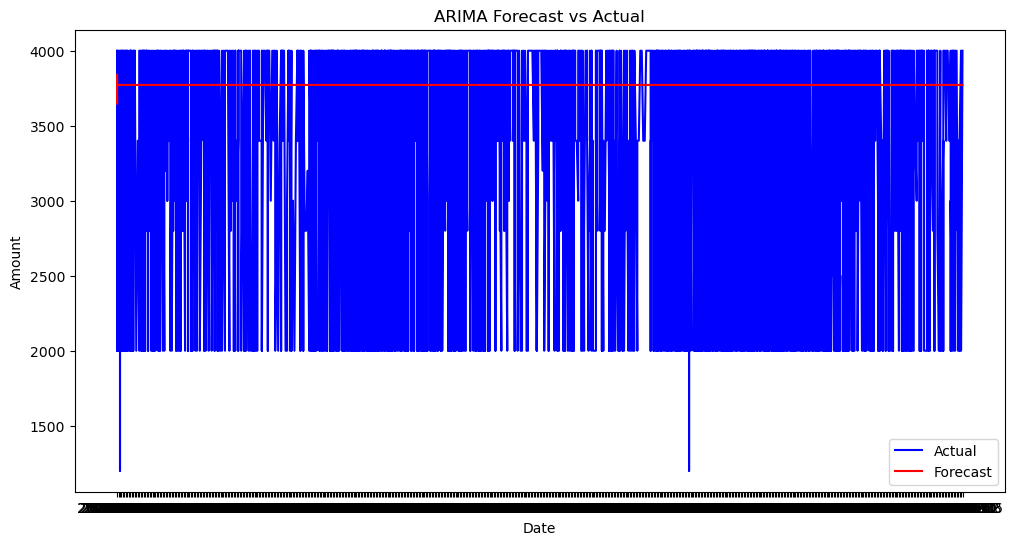

In [ ]:
# Plot the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()
